In [26]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import spacy
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import scipy.stats as st

import utils

[nltk_data] Downloading package stopwords to /Users/Sanna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df = utils.read_data(utils.DATA)
df.set_index('articleId', inplace=True)
df = df.fillna('')
df.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,...,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,
48620281,21,7,12,7,1012,,112.444444,42.857143,33.333333,33.333333,...,796,5.359296,29,9,5148,52.0,15.307692,0.146222,0.021842,9
48620381,19,6,11,5,1484,,185.500000,42.105263,31.578947,26.315789,...,452,5.938053,33,8,3182,28.0,16.142857,0.420635,0.058297,8
48622639,2,2,2,2,0,,0.000000,0.000000,100.000000,100.000000,...,396,5.848485,30,7,2776,26.0,15.230769,0.000000,0.000000,0
48623085,32,9,20,9,974,,81.166667,37.500000,28.125000,28.125000,...,367,5.594005,30,7,2442,23.0,15.956522,0.235266,0.033238,12
48623259,24,2,7,2,3797,,223.352941,70.833333,8.333333,8.333333,...,183,5.622951,22,8,1243,8.0,22.875000,1.227214,0.179689,17


In [28]:
df.loc[49200513, 'text_preprocessed'] # one example

'Die neuen Fälle von Ansteckungen mit dem Coronavirus Sars-CoV-2 haben zum Teil Konsequenzen für öffentliche Einrichtungen. In Nordrhein-Westfalen sind als Vorsichtsmaßnahme gegen die Krankheit Covid-19 einzelne Kindergärten und Schulen geschlossen, auf Teneriffa sitzen Urlauber in einem Hotel fest. Was gilt für Arbeitgeber in solchen Situationen - und was sollten Beschäftigte noch dazu wissen? Fall 1: Die Kita oder Schule bleibt geschlossen Wenn Kindergärten und Schulen aus Vorsicht zum Infektionsschutz geschlossen sind, können Arbeitnehmer im Notfall zu Hause bleiben, um ihre Kinder zu betreuen, erklärt Nathalie Oberthür, Fachanwältin für Arbeitsrecht aus Köln. Ob sie dann auch weiter ihr Gehalt bekommen, hängt aber davon ab, ob wirklich keine andere Betreuung möglich war. Paragraf 616 im Bürgerlichen Gesetzbuch (BGB) besagt, dass, wer ohne eigenes Verschulden und aus einem persönlichen Grund verhindert ist und nicht zur Arbeit kommen kann, trotzdem weiter Gehalt bekommt. Die erste M

In [29]:
df.loc[49200513, 'teaser'] # one example

"Die Ausbreitung des neuen Coronavirus' hat zum Teil Konsequenzen, die auch Arbeitnehmer betreffen können. Was gilt, wenn Kitas geschlossen bleiben oder Urlauber erstmal nicht nach Hause reisen dürfen?"

In [30]:
df.loc[49200513, 'titelH1'] # one example

'Einschränkungen wegen Covid-19: Was Arbeitnehmer wissen müssen'

In [31]:
#df.info()

In [32]:
#df.sort_values(by='pageviews', ascending=False)
#df.sort_values(by='timeOnPage', ascending=False)
#df.sort_values(by='avgTimeOnPage', ascending=False)
df.sort_values(by='stickiness', ascending=False)
#df.sort_values(by='avgTimeOnPage/wordcount', ascending=False)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,...,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,
50126023,5,1,0,0,2175,,435.000000,100.0,20.000000,0.0,...,666,5.704204,34,8,4540,45.0,14.800000,0.675466,0.095815,5
50282779,5,0,0,0,214,,42.800000,100.0,0.000000,0.0,...,127,6.133858,26,8,929,10.0,12.700000,0.324242,0.046071,5
51476285,3,0,0,0,301,,100.333333,100.0,0.000000,0.0,...,367,5.261580,23,7,2357,18.0,20.388889,0.271906,0.042568,3
51477653,7,2,0,0,455,,65.000000,100.0,28.571429,0.0,...,249,5.353414,26,6,1596,13.0,19.153846,0.275424,0.040727,7
48799335,3,0,0,0,154,,51.333333,100.0,0.000000,0.0,...,110,6.581818,21,6,849,8.0,13.750000,0.450292,0.060463,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49077665,2,1,2,1,0,,0.000000,0.0,50.000000,50.0,...,107,5.794393,25,6,743,7.0,15.285714,0.000000,0.000000,0
49133249,2,2,2,2,0,,0.000000,0.0,100.000000,100.0,...,143,6.265734,0,5,1058,9.0,15.888889,0.000000,0.000000,0
49738183,1,0,1,0,0,,0.000000,0.0,0.000000,0.0,...,262,5.549618,32,8,1749,14.0,18.714286,0.000000,0.000000,0


## Modelling pageviews / avgTimeOnPage with (lemmatized) Bag-of-Words (Ridge Regression)

In [33]:
# just take articles where ...

df = df.loc[(df['pageviews'] >= 5)]

#df = df.loc[(df['pageviews'] >= 5)
#                & (df['avgTimeOnPage/wordcount'] <= 1)
#                & (df['avgTimeOnPage/wordcount'] >= 0.1)]

print(len(df))

733


In [34]:
#creating train, dev, test
RANDOM_SEED = 123
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)
df_dev, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED, shuffle=True)
print(df_train.shape, df_dev.shape, df_test.shape)

(586, 40) (73, 40) (74, 40)


In [35]:
# lemmatizes (punctuation stays in, but the default tokenizer from Count_Vectorizer seems to delete it)
class Preprocessor():
    def __init__(self):
        self.nlp = spacy.load("de_core_news_sm", disable=['parser', 'ner'])
        #self.nlp = spacy.load("de_core_news_md", disable=['parser', 'ner'])

    def __call__(self, doc):
        rt = []
        doc = self.nlp(doc)
        for token in doc:
            rt.append(token.lemma_.lower()) # stopwords stay in, but CountVectorizer uses nltk-list later

        return " ".join(rt)

In [36]:
preprocessor = Preprocessor()
stopwords = nltk.corpus.stopwords.words('german')
print(stopwords[:10])
print(len(stopwords))
stopwords = [ preprocessor(s) for s in stopwords ]
print(stopwords[:10])
print(len(stopwords))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']
232
['aber', 'all', 'alle', 'alle', 'all', 'alle', 'als', 'also', 'am', 'an']
232


In [37]:
preprocessor = Preprocessor()
vectorizer = CountVectorizer(analyzer='word',
                             preprocessor=preprocessor,
                             ngram_range=(1, 5),
                             min_df=5, # Achtung: vielleicht je nach Textbasis anpassen?
                             max_features=10000,
                             stop_words= stopwords
                            )

In [38]:
# define text base for features: text_preprocessed? titelH1? teaser?

feature = 'text_preprocessed'
#feature = 'titelH1'
#feature = 'teaser' # note: not all have 'teaser' but I replaced Nan wih empty string ""

X_train = vectorizer.fit_transform(df_train[feature])

In [39]:
# instead: trying simple features like wordcount/mean_token_length etc.

#X_train_simple = np.array(df_train[['mean_token_length', 'mean_sentence_length']])
#X_dev_simple = np.array(df_dev[['mean_token_length', 'mean_sentence_length']])
#X_test_simple = np.array(df_test[['mean_token_length', 'mean_sentence_length']])

#print(X_train_simple.shape)

In [48]:
vectorizer.get_feature_names()[300:320] # just some n-grams

['arbeitstag',
 'arbeitsvertrag',
 'arbeitswelt',
 'arbeitszeit',
 'arbeitszeiten',
 'architekt',
 'argument',
 'arm',
 'aroma',
 'aromen',
 'art',
 'arzneimittel',
 'arzt',
 'aspekt',
 'atmen',
 'attraktiv',
 'audi',
 'aufbau',
 'aufbauen',
 'aufbewahren']

In [41]:
X_dev = vectorizer.transform(df_dev[feature])
X_test = vectorizer.transform(df_test[feature])

In [42]:
X_train, X_dev, X_test = X_train.toarray(), X_dev.toarray(), X_test.toarray()

In [43]:
X_train.shape, X_dev.shape, X_test.shape

((586, 3738), (73, 3738), (74, 3738))

In [44]:
X_train[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
# convert to relative frequencies
X_train_rel = X_train/X_train.sum(axis=1, keepdims=True)
X_dev_rel = X_dev/X_dev.sum(axis=1, keepdims=True)
X_test_rel = X_test/X_test.sum(axis=1, keepdims=True)

In [46]:
X_train_rel[:5]

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.003861],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [58]:
# define the target labels
#target = 'timeOnPage'
#target =  'pageviews'
#target = 'avgTimeOnPage'
#target = 'stickiness'
target = 'avgTimeOnPage/wordcount'
#target = 'avgTimeOnPage/nr_char'
#target = 'bounceRate'
#target = 'stickiness'


y_train = np.array(df_train[target])
y_dev = np.array(df_dev[target])
y_test = np.array(df_test[target])

In [59]:
y_train.shape, y_dev.shape, y_test.shape

((586,), (73,), (74,))

In [60]:
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor

In [61]:
# choose model ???
model = Ridge()
#model = LinearRegression()
#model = SGDRegressor()

In [62]:
model.fit(X_train_rel, y_train)

#model.fit(X_train_simple, y_train)

Ridge()

In [63]:
# predict for dev set
pred_dev = model.predict(X_dev_rel)

#pred_dev = model.predict(X_dev_simple)

In [64]:
# postprocessing: replace negative values with 0 (better way? can I give that hint to the model?)
pred_dev[pred_dev < 0] = 0
pred_dev

array([0.43088468, 0.41313239, 0.46005495, 0.44474229, 0.43744413,
       0.41888213, 0.42462203, 0.41811219, 0.41647528, 0.43400635,
       0.42124011, 0.44594587, 0.41163006, 0.41819934, 0.42317572,
       0.42800544, 0.4316078 , 0.42810169, 0.4297152 , 0.40107037,
       0.41887608, 0.41496635, 0.42077556, 0.41094837, 0.41128553,
       0.44554755, 0.42112566, 0.41253901, 0.40727977, 0.41748179,
       0.42235824, 0.42505859, 0.42114358, 0.42040773, 0.41658654,
       0.40239764, 0.4253263 , 0.43321273, 0.42022341, 0.43317989,
       0.42217288, 0.42194997, 0.44628734, 0.41516764, 0.43973436,
       0.41965723, 0.42343946, 0.41241599, 0.44095623, 0.42116496,
       0.42786281, 0.43190191, 0.42545093, 0.43458294, 0.41605097,
       0.4214617 , 0.4101601 , 0.42926345, 0.44653812, 0.42606316,
       0.40771965, 0.41936285, 0.43144062, 0.41978906, 0.41229515,
       0.43435014, 0.40752952, 0.43342705, 0.43834624, 0.43011398,
       0.42882155, 0.41913593, 0.44238537])

In [65]:
np.array(y_dev)

array([0.24333333, 0.        , 0.50920635, 0.70205479, 0.5951087 ,
       0.27756286, 0.33176101, 0.33628319, 0.14519056, 0.37820513,
       0.23131673, 0.05400697, 0.06069878, 0.3583691 , 0.16612378,
       0.36098131, 3.71304348, 0.51876877, 0.23838157, 0.42494824,
       0.33716475, 0.45861298, 0.25011865, 0.2122281 , 0.05964215,
       0.30461923, 0.57412791, 0.1318618 , 0.25092937, 0.49439462,
       0.        , 0.39010989, 0.58191564, 0.17137681, 0.2652921 ,
       0.21181939, 0.28148148, 0.27783251, 0.22079832, 0.30717115,
       0.68575851, 0.51428571, 0.17183099, 0.52195122, 0.78584008,
       0.15553977, 0.28708551, 0.05582137, 2.64919637, 0.46346791,
       0.6234957 , 0.2893401 , 0.53488372, 0.40402882, 0.32669323,
       0.66100896, 0.23084677, 0.90271493, 0.10939511, 0.18778428,
       0.14960457, 0.67546584, 0.5739645 , 0.29840637, 0.82      ,
       1.53325148, 0.11523438, 0.23134328, 0.34850949, 0.39184696,
       0.5754386 , 0.26368159, 1.00405743])

In [66]:
st.pearsonr(pred_dev, y_dev)

(0.26778572510118936, 0.021993696586301743)

In [635]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [636]:
mean_squared_error(pred_dev, y_dev) #, squared=False) # hard to interpret

575.7709130048818

In [637]:
mean_absolute_error(pred_dev, y_dev) # hard to interpret

19.62471231373354

In [638]:
explained_variance_score(pred_dev, y_dev) # what does this number mean? ... (1.0 is best)

-1178.8666796215657

In [639]:
df_dev.iloc[4] # Example where timeOnPage = 0 (boring article! :D)

pageviews                                                                 10
entrances                                                                  0
exits                                                                      2
bounces                                                                    0
timeOnPage                                                               438
conversions                                                                 
avgTimeOnPage                                                          54.75
stickiness                                                                80
entranceRate                                                               0
bounceRate                                                                 0
kategorie                                                           ratgeber
rubrik                                                          bauen-wohnen
subRubrik                                                                   

In [640]:
#vectorizer.stop_words_ # shows not used features (in too many/little documents)
#vectorizer.vocabulary_ # values are the indices! (not frequency or anything)

## Beobachtung

Bei pageviews vielleicht eher den Titel oder Teaser als den Text selbst nehmen? (--> etwas besser, dann aber min_df ändern) --> Titel ist besser als Teaser (vielleicht auch sinnvoller?)

Welches Label ist das sinnvollste?

Welche Metrik? Pearson Korrelation? Mean Squared/Absolute Error?

Problem: Target-Varieblen sind sehr unausgeglichen, wenige Artikel mit sehr hoher pageview-Zahl (outliers)

## Trying SHAP

In [641]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [642]:
# hier auswählen, auf welchem Set Shap-Werte berechnet und visualisiert werden
explain_set = X_dev_rel
explain_df = df_dev

In [643]:
explainer = shap.LinearExplainer(model, X_train_rel, feature_dependence="independent")
shap_values = explainer.shap_values(explain_set)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


In [644]:
explain_set.shape

(73, 3738)

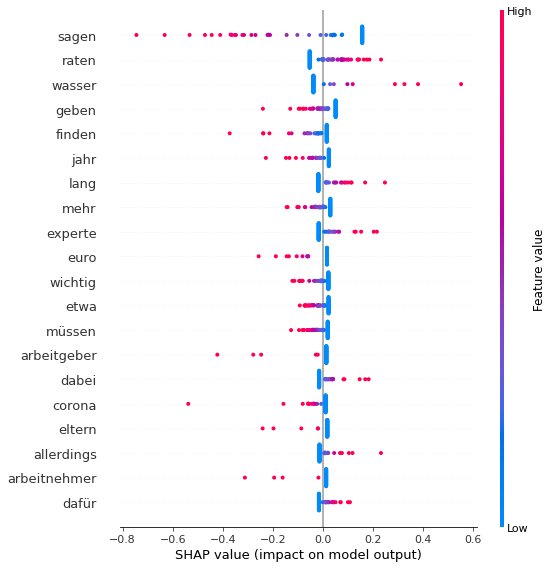

In [645]:
shap.summary_plot(shap_values, explain_set, feature_names=vectorizer.get_feature_names())

# rot/blau zeigt Feature Value, also rot=Feature ist da, blau=Feature ist nicht da

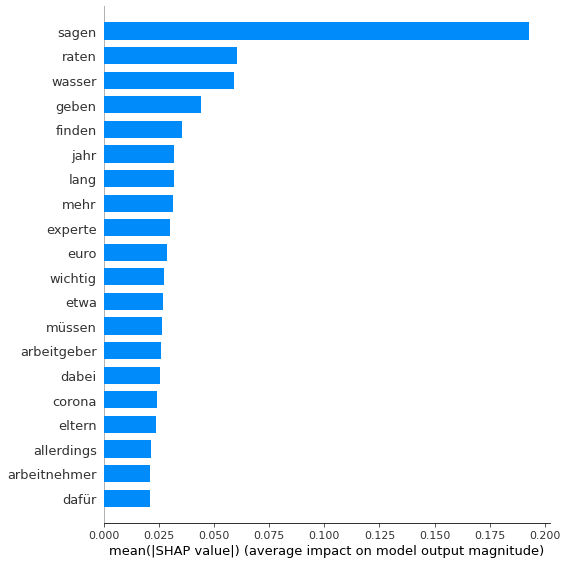

In [646]:
shap.summary_plot(shap_values, explain_set, plot_type="bar", feature_names=vectorizer.get_feature_names())

In [647]:
#shap.force_plot(explainer.expected_value, 
#                shap_values, 
#                explain_set, 
#                feature_names=vectorizer.get_feature_names())

# was zeigt das hier genau???

In [648]:
ind = 5
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                explain_set[ind,:],
                feature_names=vectorizer.get_feature_names()
               )

In [649]:
explain_df.iloc[ind].titelH1

'Schneller, leichter, bequemer - So motzen Sie Ihr Fahrrad auf'

In [650]:
ind = 4
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                explain_set[ind,:],
                feature_names=vectorizer.get_feature_names()
               )

In [651]:
explain_df.iloc[ind].titelH1

'Nach dem\xa0Winter:\xa0So bleiben Wolldecken beim\xa0Waschen weich'

In [652]:
ind = 11
shap.force_plot(explainer.expected_value,
                shap_values[ind,:],
                explain_set[ind,:],
                feature_names=vectorizer.get_feature_names()
               )

In [582]:
explain_df.iloc[ind].titelH1

'Einfach weg damit? - Regeln für die Müllentsorgung im Mietshaus'

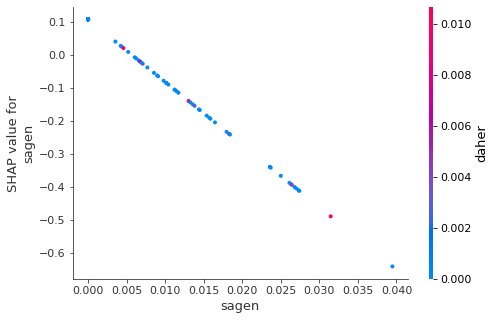

In [584]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("sagen", shap_values, explain_set, feature_names=vectorizer.get_feature_names())